<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Data-and-Create-ICA_DATA-Object" data-toc-modified-id="Import-Data-and-Create-ICA_DATA-Object-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Data and Create ICA_DATA Object</a></span><ul class="toc-item"><li><span><a href="#Rename-iModulons" data-toc-modified-id="Rename-iModulons-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Rename iModulons</a></span></li></ul></li><li><span><a href="#Create-iModulon-Donut-Chart-/-Treemap" data-toc-modified-id="Create-iModulon-Donut-Chart-/-Treemap-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create iModulon Donut Chart / Treemap</a></span></li><li><span><a href="#Create-Precision/Recall-Plot" data-toc-modified-id="Create-Precision/Recall-Plot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create Precision/Recall Plot</a></span></li><li><span><a href="#Expalined-Variance-Plots" data-toc-modified-id="Expalined-Variance-Plots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Expalined Variance Plots</a></span></li></ul></div>

In [1]:
from pymodulon.core import *
from pymodulon.plotting import *
from pymodulon.enrichment import *
from pymodulon.compare import *
from pymodulon.io import *

from Bio.KEGG import REST
import tqdm.notebook as tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib_venn import *
import seaborn as sns

from matplotlib.lines import Line2D
from os import path

# Import Data and Create ICA_DATA Object

In [2]:
interim = path.join("..","data","interim","ica_runs","180")
processed = path.join("..","data","processed_data")

ica_data = IcaData(path.join(interim,"S.csv"),
                   path.join(interim,"A.csv"), 
                   X=path.join(processed,"log_tpm_norm.csv"),
                   sample_table=path.join(processed,"metadata_final.csv"), 
                   trn = path.join(processed,"TRN.csv"),
                   gene_table=path.join(processed,"gene_info.csv"))


## Rename iModulons

In [3]:
comp_names = list(pd.read_csv(path.join(processed,"iModulon_names.csv"),index_col=0).index)

rename = {}

for old,new in zip(range(0,80),comp_names):
    rename.update({old:new})

ica_data.rename_imodulons(rename)

ica_data.change_threshold("Central Carbon Metabolism",.05)
ica_data.change_threshold("Peptidoglycan Biosynthesis",.06)


ica_data.A.head()

,SRX3995807,SRX3995806,SRX3995809,SRX3995808,SRX4619048,SRX4619047,SRX4619049,SRX4619050,SRX3995804,SRX3995805,...,SRX4498326,SRX4498328,SRX4498330,SRX4498336,SRX4498333,SRX4498338,SRX4498329,SRX4498325,SRX4498327,SRX4498331
SigH,2.233529,1.747683,1.950159,1.272614,2.236327,1.461665,1.721740,1.716646,0.199084,-0.199084,...,-0.073048,-0.089859,-0.056653,0.272666,0.561386,0.565625,0.928080,0.692540,0.989420,0.978320
Polyketide Synthase Complex,-1.006571,-1.096669,-1.035640,-1.020379,-1.284973,-1.032381,-0.228997,-0.436043,-0.339446,0.339446,...,-0.060317,0.071409,0.197522,4.220594,4.335245,4.791054,2.873865,3.053068,3.106209,2.544357
IniR,-1.633546,-1.525702,-0.973362,-0.412119,-1.575615,-0.661602,-0.413391,-1.286532,-0.227573,0.227573,...,-0.082660,-0.249290,0.542238,-1.337300,-1.332386,-0.657241,-1.025463,-0.751884,-0.543233,-0.929784
PyrR,0.724746,0.685656,0.463208,0.779347,0.891500,0.706596,1.367180,1.396856,0.426180,-0.426180,...,0.094624,0.297912,-0.241379,1.186755,0.660442,0.640216,1.951114,2.235133,2.241501,1.747601
WhiB4,-0.187071,0.778767,-0.132223,0.820021,0.097570,1.035989,1.112930,0.707870,0.450103,-0.450103,...,-0.196057,-0.186073,0.212741,1.362617,1.387968,1.945811,1.459615,2.011044,1.298987,1.454773


# Create iModulon Donut Chart / Treemap

In [4]:
# Import iModulon information from file
imod_info = pd.read_csv(path.join(processed,"imod_info.csv"),index_col=0)
imod_info["name"] = comp_names
imod_info.to_csv(path.join("..","data","processed_data","tree_map.csv"))
imod_info.head()

,size,name,unc,Categories
0,45,SigH,Characterized,Redox
1,2,Polyketide Synthase Complex,Characterized,Fatty Acid/Cholestrol
2,3,IniR,Characterized,Antibiotic
3,44,PyrR,Characterized,Nucleic Acids
4,95,WhiB4,Characterized,Redox


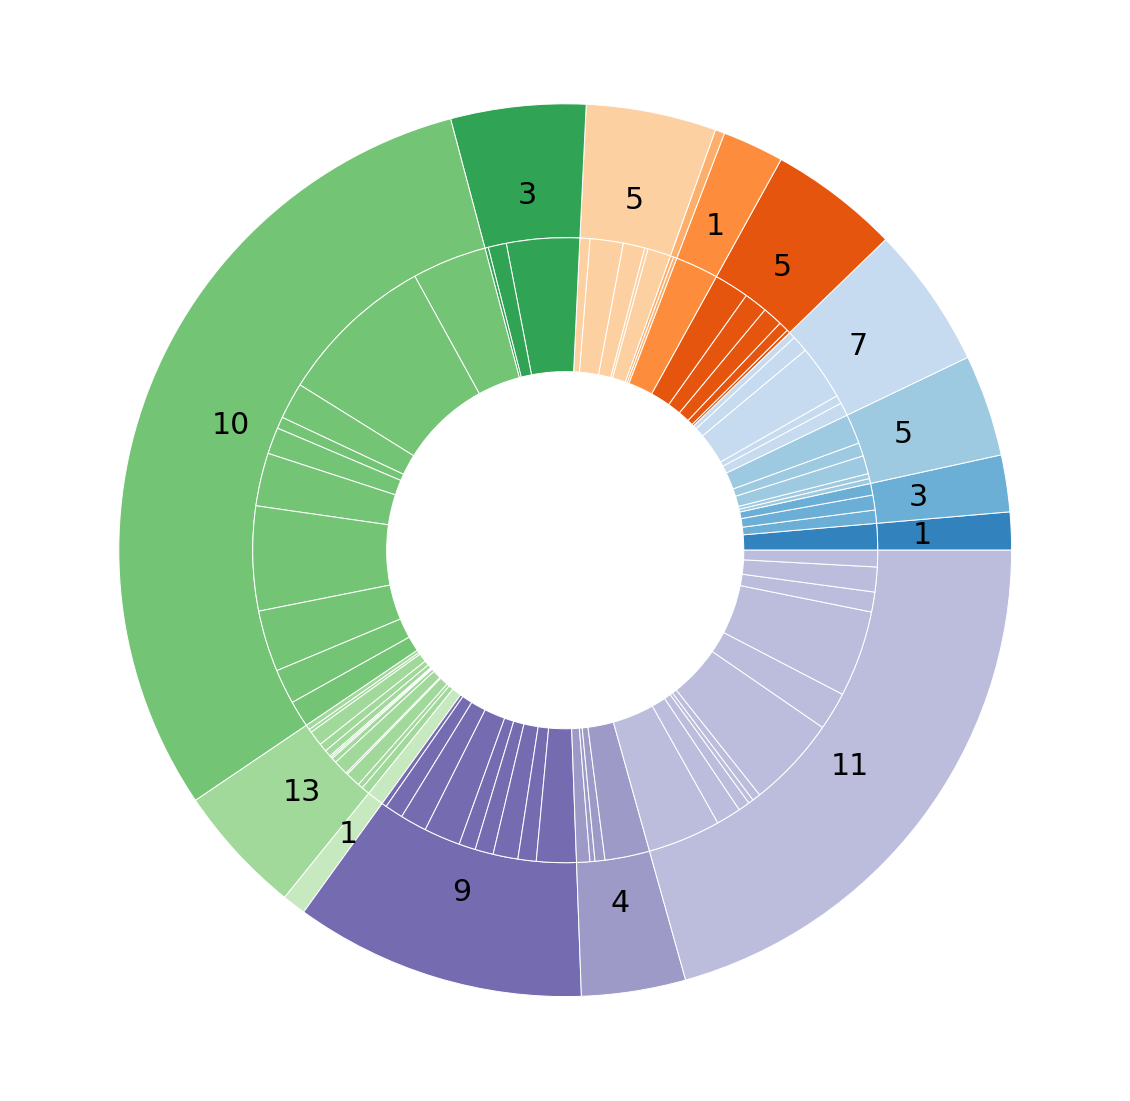

In [5]:
# Init axes object
fig, ax = plt.subplots(figsize=[20,20])
ax.axis('equal')
width = 0.3

# Init variables and color map
cm = plt.get_cmap("tab20c")
groups = imod_info.groupby(imod_info["Categories"])
category_size = []
category_label = []
category_color = []
imod_size = []
imod_color = []

# Build Donut Chart
idx = 0
for i,j in groups:
    if i != "KO": # Ignore KO label
        category_label.append(len(j))
    else:
        category_label.append("")
    category_size.append(sum(j["size"]))
    category_color.append(cm(idx))
    for imod_name,row in j.iterrows():
        imod_color.append(cm(idx))
        imod_size.append(row["size"])
    idx+=1

# Add Color and Text
cout = cm(np.arange(3)*4)
pie, texts = ax.pie(category_size,radius=1, labels=category_label,colors = category_color,
                    labeldistance = .8)
plt.setp(pie, width=width, edgecolor='white')
plt.setp(texts, size='30',ha="center")

pie2, _ = ax.pie(imod_size, radius=1-width, colors=imod_color)
set_plot = plt.setp( pie2, width=width, edgecolor='white')

#plt.savefig("../figures/interim_figures/iMod_Donut_Chart.svg",transparent = True)

In [6]:
%load_ext rpy2.ipython

In [7]:
"""%%R
library('treemap') #load treemap, make sure its installed in your env

svg(filename="../figures/interim_figures/tree_map.svg", #file where it will be saved
    width=6, #svg params, change as you need
    height=6, 
    pointsize=12)

tree_df = read.csv("../data/processed_data/tree_map.csv",row.names="X") 
treemap(tree_df, index=c('Categories', 'name'), vSize='size') #make the treemap

dev.off() #close svg"""

'%%R\nlibrary(\'treemap\') #load treemap, make sure its installed in your env\n\nsvg(filename="../figures/interim_figures/tree_map.svg", #file where it will be saved\n    width=6, #svg params, change as you need\n    height=6, \n    pointsize=12)\n\ntree_df = read.csv("../data/processed_data/tree_map.csv",row.names="X") \ntreemap(tree_df, index=c(\'Categories\', \'name\'), vSize=\'size\') #make the treemap\n\ndev.off() #close svg'

# Create Precision/Recall Plot

In [8]:
iModulon_table = pd.read_csv(path.join("..","data","processed_data","iModulon_table.csv"),index_col=0)
iModulon_table

,TF,Function,Category,n_genes,precision,recall,category_num
Name,,,,,,,
SigH,sigH,Sigma Factor involved in heat shock and oxidat...,Virulence/Persistence,45,0.082192,0.800000,0
Polyketide Synthase Complex,NaN,KEGG Map related to the synthesis of type II p...,Fatty Acid/Cholestrol,2,0.333333,1.000000,1
IniR,iniR,Transcription factor that regulates the expres...,Antibiotic,3,0.100000,1.000000,2
PyrR,pyrR,Transcription factor that regulates the expres...,Nucleic Acids,44,0.000000,0.000000,3
WhiB4,whiB4,Redox-Responsive transcription regulator that ...,Redox,95,0.184834,0.410526,4
...,...,...,...,...,...,...,...
Unc_9,NaN,Uncharacterized iModulon 9,Uncharacterized,24,0.000000,0.000000,75
SG_13,NaN,Single Gene iModulon 13,Single Gene,5,0.000000,0.000000,76
Central Carbon Metabolism,NaN,iModulon enriched with the Central Carbon Meta...,Central Carbon,28,0.000000,0.000000,77


In [9]:
mean_regulon_recall = []
mean_imodulon_recall = []
for i,row in iModulon_table.iterrows():
    if row["recall"] > 0 and row["precision"] > 0:
        mean_regulon_recall.append(row["recall"])
        mean_imodulon_recall.append(row["precision"])
mean_regulon_recall = np.mean(mean_regulon_recall)
mean_imodulon_recall = np.mean(mean_imodulon_recall)
print("Mean Regulon Recall: "+ str(mean_regulon_recall))
print("Mean iModulon Recall: "+ str(mean_imodulon_recall))

Mean Regulon Recall: 0.6590888971604651
Mean iModulon Recall: 0.39826123521627904


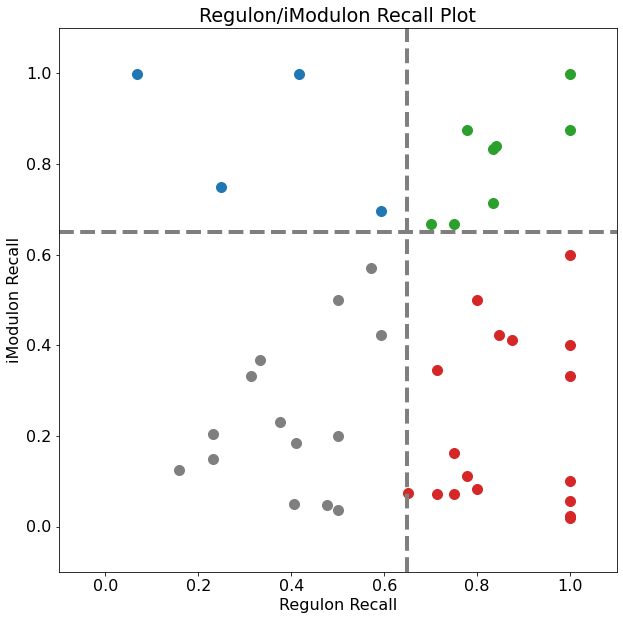

In [10]:
plt.rcParams['font.size'] = '16'

fig,ax = plt.subplots(figsize=[10,10])
for i,row in iModulon_table.iterrows():
    if row["recall"] == 0 and row["precision"] == 0:
        continue
    if row["recall"] < .65 and row["precision"] < .65:
        ax.plot(row["recall"],row["precision"],"o",color="tab:grey",markersize= 10)
    elif row["recall"] > .65 and row["precision"] < .65:
        ax.plot(row["recall"],row["precision"],"o",color="tab:red",markersize= 10)
    elif row["recall"] < .65 and row["precision"] > .65:
        ax.plot(row["recall"],row["precision"],"o",color="tab:blue",markersize= 10)
    else:
        ax.plot(row["recall"],row["precision"],"o",color="tab:green",markersize= 10)

ax.set_ylim([-.1,1.1])
ax.set_xlim([-.1,1.1])
ax.plot([.65,.65],[-.1,1.1],"--",color="tab:grey",linewidth=4)
ax.plot([-.1,1.1],[.65,.65],"--",color="tab:grey",linewidth=4)
ax.set_ylabel("iModulon Recall")
ax.set_xlabel("Regulon Recall")
ax.set_title("Regulon/iModulon Recall Plot")
plt.savefig("../figures/interim_figures/precision_recall_plot.svg",transparent=True)

# Expalined Variance Plots

([], [])

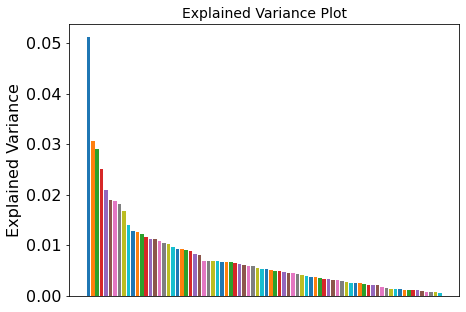

In [12]:
explained_variance_values = {}
for i in ica_data.A.index:
    explained_variance_values.update({i:explained_variance(ica_data,imodulons=i)})
fig,ax = plt.subplots(figsize=[7,5])
count = 0
sorted_dict = []
for i in sorted(explained_variance_values.values(), reverse = True):
    for j in explained_variance_values.keys():
        if explained_variance_values[j] == i:
            sorted_dict.append(j)
            
for i in sorted(explained_variance_values.values(),reverse =True):
    ax.bar(count,i)
    count += 1
    
ax.set_title("Explained Variance Plot",fontsize=14)
ax.set_ylabel("Explained Variance")
plt.xticks([],fontsize=12)
#plt.savefig("../figures/interim_figures/explained_variance.svg",transparent=True)    

In [13]:
total = 0
for i in sorted(explained_variance_values.values(),reverse =True):
    total+=i
total

0.6061113692740961